# Financial Predictive Modeling Project

## Project Summary
The objective of this project is to build a predictive model that estimates key financial metrics based on historical and synthetic data. By leveraging structured data, feature engineering, and regression modeling, the project aims to provide actionable insights for decision-makers. This model is intended to identify trends, support scenario analysis, and improve the accuracy of financial forecasts in a controlled environment.

Accurate predictions are critical for stakeholders who rely on timely insights to make investment or operational decisions. Even small improvements in predictive accuracy can translate into better risk management, resource allocation, and strategic planning. By creating a robust and reproducible pipeline, this project ensures stakeholders can trust and act upon the results consistently.

## Stakeholder Persona / Context
| Stakeholder       | Role / Needs | Interests & Concerns |
|------------------|-------------|--------------------|
| Investment Analyst | Uses model outputs for portfolio strategy | Accuracy, timely delivery, interpretability |
| Risk Manager       | Monitors potential exposure | Model reliability, error tracking, transparency |
| Team Lead / PM     | Oversees project progress | Reproducibility, workflow clarity, deployment readiness |

**Context Description:**  
The primary users of this project are analysts and managers within a financial team who need clear, interpretable, and timely predictions. They care about accuracy, reliability, and the ability to audit and reproduce results. Ensuring a smooth workflow and clear communication of outputs is crucial for their decision-making.

## Python Fundamentals Summary

In [1]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.append(str(project_root))
from src.utils import parse_date_column, convert_column_type, fill_missing_values


data = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'age': [25, np.nan, 35, 40],
    'salary': [70000, 80000, np.nan, 90000],
    'join_date': ['2023-01-15', '2022-11-30', '2023-03-20', '2022-03-20']
})

data

,name,age,salary,join_date
0,Alice,25.0,70000.0,2023-01-15
1,Bob,NaN,80000.0,2022-11-30
2,Charlie,35.0,NaN,2023-03-20
3,David,40.0,90000.0,2022-03-20


In [2]:
# Convert age and salary columns to float
data = convert_column_type(data, column='age', dtype='int')
data = convert_column_type(data, column='salary', dtype='float')
data['join_date'] = pd.to_datetime(data['join_date'], infer_datetime_format=True, errors='coerce')
data

/var/folders/xt/g4dt2xmn47x1nq6hz8n9pvl80000gn/T/ipykernel_35803/3626987102.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['join_date'] = pd.to_datetime(data['join_date'], infer_datetime_format=True, errors='coerce')


,name,age,salary,join_date
0,Alice,25.0,70000.0,2023-01-15
1,Bob,NaN,80000.0,2022-11-30
2,Charlie,35.0,NaN,2023-03-20
3,David,40.0,90000.0,2022-03-20


In [3]:
# Fill missing values
data = fill_missing_values(data, strategy='mean')
data

,name,age,salary,join_date
0,Alice,25.000000,70000.0,2023-01-15
1,Bob,33.333333,80000.0,2022-11-30
2,Charlie,35.000000,80000.0,2023-03-20
3,David,40.000000,90000.0,2022-03-20


In [4]:
# Basic NumPy operations
ages = data['age'].to_numpy()
mean_age = np.mean(ages)
print("Mean age:", mean_age)

salaries = data['salary'].to_numpy()
total_salary = np.sum(salaries)
print("Total salary:", total_salary)

# Basic pandas operations
# Add a new calculated column
data['salary_in_k'] = data['salary'] / 1000
print("\nDataFrame with new column 'salary_in_k':")
print(data)

# Filter rows
high_salary = data[data['salary'] > 75000]
print("\nFiltered DataFrame (salary > 75k):")
print(high_salary)

Mean age: 33.333333333333336
Total salary: 320000.0

DataFrame with new column 'salary_in_k':
      name        age   salary  join_date  salary_in_k
0    Alice  25.000000  70000.0 2023-01-15         70.0
1      Bob  33.333333  80000.0 2022-11-30         80.0
2  Charlie  35.000000  80000.0 2023-03-20         80.0
3    David  40.000000  90000.0 2022-03-20         90.0

Filtered DataFrame (salary > 75k):
      name        age   salary  join_date  salary_in_k
1      Bob  33.333333  80000.0 2022-11-30         80.0
2  Charlie  35.000000  80000.0 2023-03-20         80.0
3    David  40.000000  90000.0 2022-03-20         90.0


## Data Acquisition and Ingestion

In [5]:
from src.data_ingestion import fetch_sample_data
fetch_sample_data()

Data saved to ../data/raw/ibm_daily_raw.csv


## Data Storage(preview)

In [7]:
import os
import pandas as pd
from dotenv import load_dotenv

load_dotenv()
DATA_PATH = os.getenv("DATA_PATH", "../data/raw/")
df = pd.read_csv(os.path.join(DATA_PATH, "ibm_daily_raw.csv"))
print(DATA_PATH)
print(df)

../data/raw/
          date  1. open   2. high    3. low  4. close  5. volume
0   2025-08-29  245.230  245.4599  241.7200    243.49    2967558
1   2025-08-28  245.430  245.8800  243.3600    245.73    2820817
2   2025-08-27  242.870  245.9600  242.0000    244.84    3698372
3   2025-08-26  241.020  244.9800  240.3800    242.63    5386582
4   2025-08-25  242.565  242.5650  239.4300    239.43    3513327
..         ...      ...       ...       ...       ...        ...
95  2025-04-14  239.770  241.7700  236.7300    239.06    3321717
96  2025-04-11  229.720  237.5800  227.5100    235.48    4325895
97  2025-04-10  231.000  232.5700  222.0200    229.55    5656108
98  2025-04-09  217.120  236.3000  215.1636    235.31    7302808
99  2025-04-08  232.560  233.0500  217.2800    221.03    6849996

[100 rows x 6 columns]


## Data Preprocessing

In [14]:
import pandas as pd
from src.cleaning import drop_missing_threshold, fill_missing, standardize_column_names

# load data
df = pd.read_csv("../data/raw/ibm_daily_raw.csv")

# cleaning
df = drop_missing_threshold(df, threshold=0.4)
df = fill_missing(df, "1. open", method="median")

# save
df.to_csv("../data/processed/ibm_daily_clean.csv", index=False)

## Outlier Analysis

Original dataset shape: (205, 1)
After removing outliers shape: (197, 1)


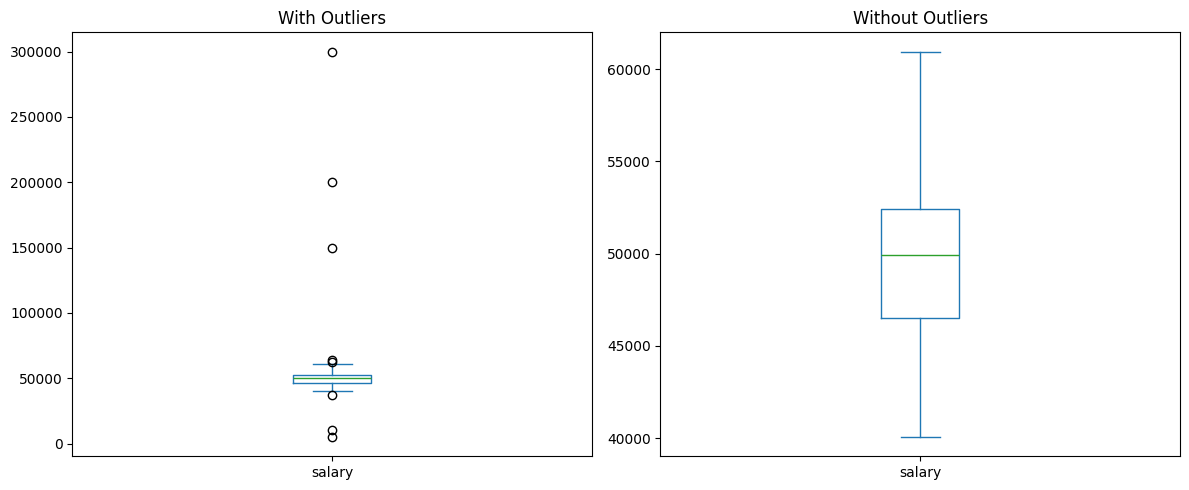

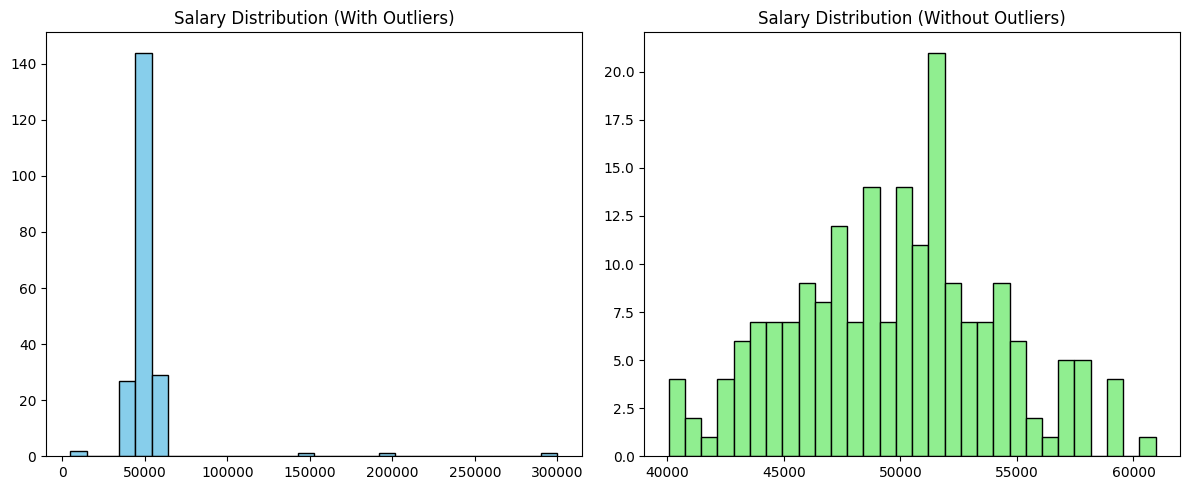

       With Outliers  Without Outliers
count     205.000000        197.000000
mean    51825.507487      49727.973117
std     22389.415139       4401.795327
min      5000.000000      40062.155427
25%     46428.242910      46489.734531
50%     50025.567283      49932.513876
75%     52609.707828      52412.362076
max    300000.000000      60952.278129


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from src.outliers import handle_outliers

np.random.seed(42)
normal_salaries = np.random.normal(loc=50000, scale=5000, size=200)
outliers = np.array([150000, 200000, 300000, 10000, 5000])
salaries = np.concatenate([normal_salaries, outliers])
df = pd.DataFrame({"salary": salaries})
print("Original dataset shape:", df.shape)

# Remove outliers using IQR
df_no_outliers = handle_outliers(df, column="salary", method="remove")
print("After removing outliers shape:", df_no_outliers.shape)


# Visualization: Boxplot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df['salary'].plot.box(ax=axes[0], title="With Outliers")
df_no_outliers['salary'].plot.box(ax=axes[1], title="Without Outliers")
plt.tight_layout()
plt.show()


# Visualization: Histogram comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(df['salary'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title("Salary Distribution (With Outliers)")

axes[1].hist(df_no_outliers['salary'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title("Salary Distribution (Without Outliers)")

plt.tight_layout()
plt.show()


# Summary statistics
summary = pd.DataFrame({
    "With Outliers": df['salary'].describe(),
    "Without Outliers": df_no_outliers['salary'].describe()
})

print(summary)

## Exploratory Data Analysis (EDA)

/var/folders/xt/g4dt2xmn47x1nq6hz8n9pvl80000gn/T/ipykernel_35803/1106617164.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "join_date": pd.date_range(start="2010-01-01", periods=n, freq="M")


Dataset shape: (200, 4)
           count                 mean                  min  \
age        197.0            34.522843                  8.0   
salary     196.0         51509.531926         24069.861279   
tenure     200.0                10.02                  1.0   
join_date    200  2018-05-16 03:14:24  2010-01-31 00:00:00   

                           25%                  50%                  75%  \
age                       28.0                 35.0                 40.0   
salary            45095.498042         50715.480418         56001.700072   
tenure                     5.0                 10.0                 15.0   
join_date  2014-03-23 06:00:00  2018-05-15 12:00:00  2022-07-07 18:00:00   

                           max           std  missing_values  skewness  
age                       99.0     10.364073               3  1.260658  
salary                200000.0  13298.020655               4  7.184474  
tenure                    19.0      5.746714               0  0.0

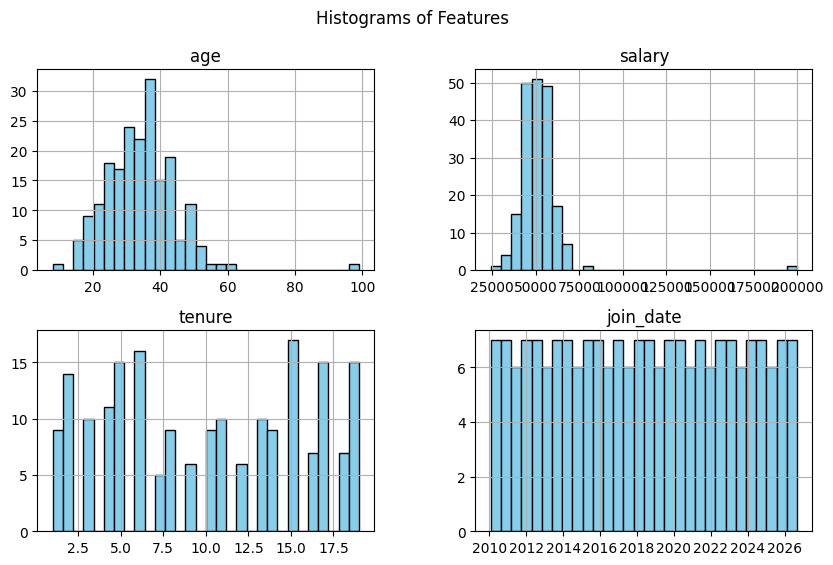

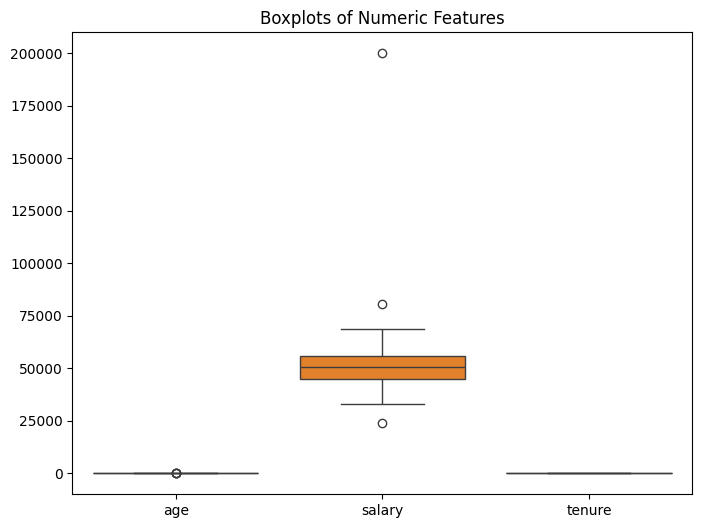

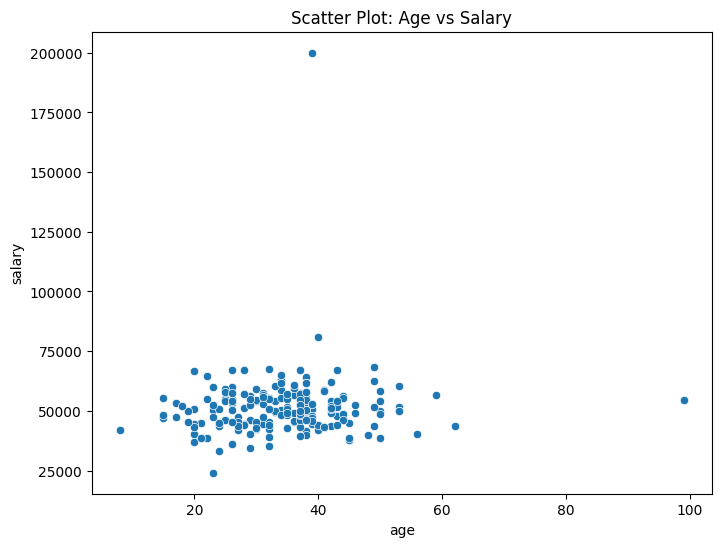

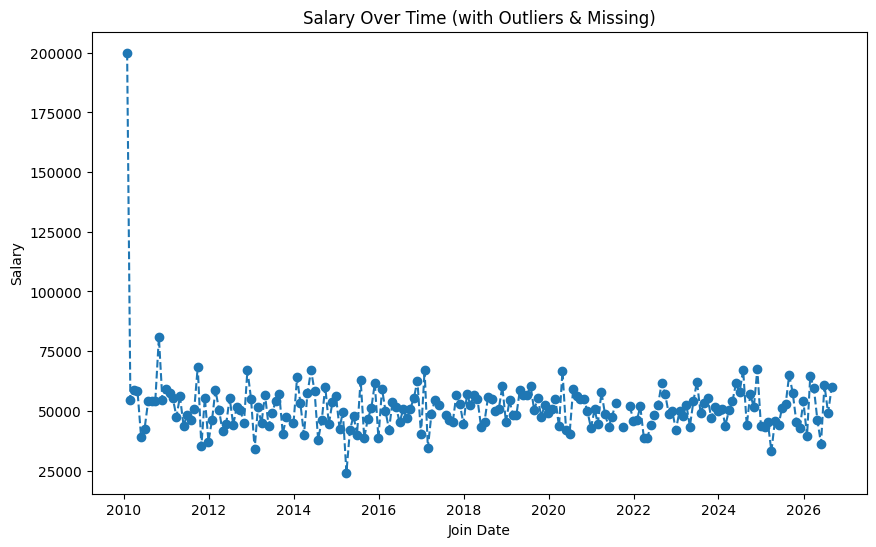

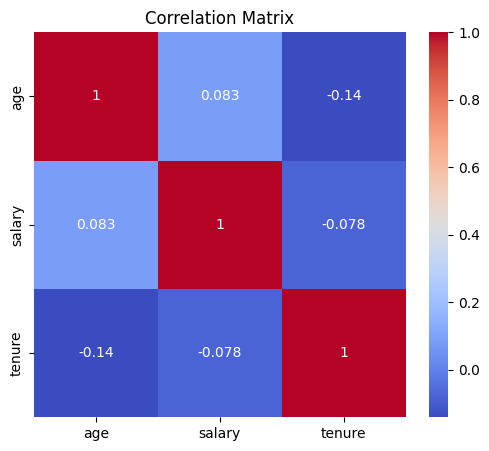

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
n = 200
df = pd.DataFrame({
    "age": np.random.normal(35, 10, n).astype(int),
    "salary": np.random.normal(50000, 8000, n),
    "tenure": np.random.randint(1, 20, n),
    "join_date": pd.date_range(start="2010-01-01", periods=n, freq="M")
})

df.loc[np.random.choice(n, 5), "salary"] = np.nan
df.loc[np.random.choice(n, 3), "age"] = np.nan
df.loc[0, "salary"] = 200000
df.loc[1, "age"] = 99

print("Dataset shape:", df.shape)

# Statistical summaries
summary = df.describe().T
summary["missing_values"] = df.isnull().sum()
summary["skewness"] = df.skew(numeric_only=True)
print(summary)

# Histograms
df.hist(bins=30, figsize=(10, 6), color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Features")
plt.show()

# Boxplots (check outliers)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[["age", "salary", "tenure"]])
plt.title("Boxplots of Numeric Features")
plt.show()

# Scatter plot (Age vs Salary)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="age", y="salary", data=df)
plt.title("Scatter Plot: Age vs Salary")
plt.show()

# Time series plot (Salary trend)
plt.figure(figsize=(10, 6))
plt.plot(df["join_date"], df["salary"], marker="o", linestyle="--")
plt.title("Salary Over Time (with Outliers & Missing)")
plt.xlabel("Join Date")
plt.ylabel("Salary")
plt.show()

# Correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(df[["age", "salary", "tenure"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Feature Engineering

In [19]:
# Date Feature Engineering
df["join_year"] = df["join_date"].dt.year
df["join_month"] = df["join_date"].dt.month
df["years_since_join"] = 2025 - df["join_year"]   

# Numeric Transformations
df["log_salary"] = np.log1p(df["salary"])  

# Interaction Features
df["avg_income_per_year"] = df["salary"] / df["tenure"]
df["income_x_tenure"] = df["salary"] * df["tenure"]

print("Transformed dataset shape:", df.shape)
df.head(10)

# Save Processed Features
df.to_csv("../data/processed/feature_engineered.csv", index=False)
print("Saved feature-engineered dataset to ../data/processed/feature_engineered.csv")

Transformed dataset shape: (200, 10)
Saved feature-engineered dataset to ../data/processed/feature_engineered.csv


## LinearRegression

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("../data/processed/feature_engineered.csv")

df = df.dropna(subset=["salary"])
df['age'] = df['age'].fillna(df['age'].mean())

features = ["age", "tenure", "years_since_join", "log_salary"]
target = "salary"

X = df[features]
y = df[target]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})
print("Intercept:", model.intercept_)
print(coef_df)

# Predictions & Residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Performance metrics
print("R^2 score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Intercept: -660831.8243395837
            Feature   Coefficient
0               age    -38.644933
1            tenure   -120.444870
2  years_since_join    127.880870
3        log_salary  65947.241536
R^2 score: 0.9201714895375881
RMSE: 2112.0756235882077


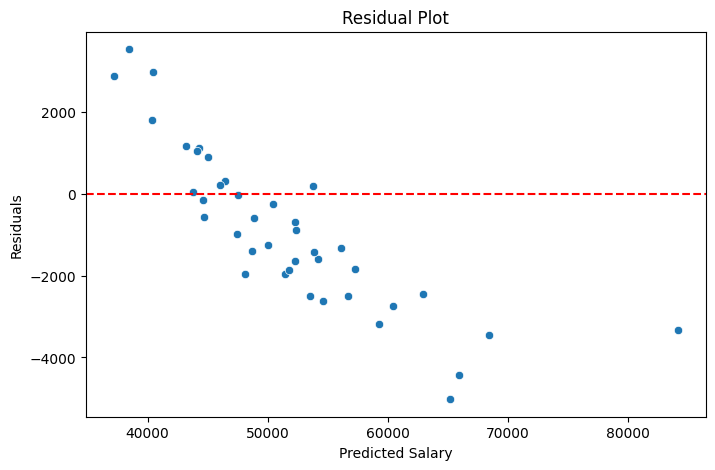

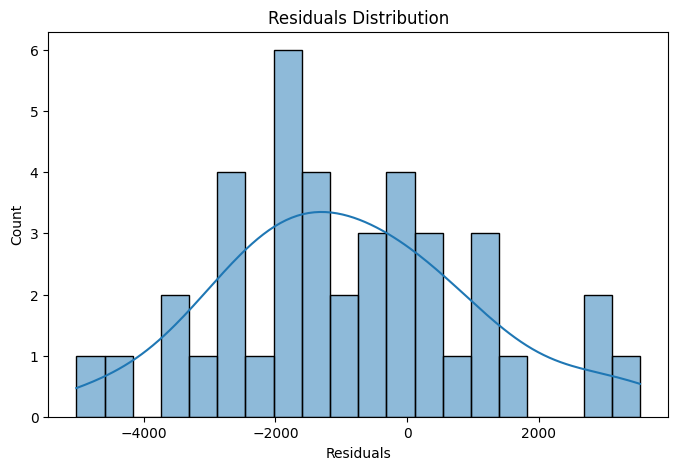

In [26]:
# Residual Analysis
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

### Linear Regression Assumptions

1. **Linearity**: The relationship between features and target is linear.
2. **Independence**: Observations are independent of each other.
3. **Homoscedasticity**: The variance of residuals is constant across predictions.
4. **Normality of residuals**: Residuals should follow approximately normal distribution.
5. **No multicollinearity**: Features should not be highly correlated with each other.

## Time Series Modeling

MSE: 32042199.34572558
MAE: 4658.314403513258
R2: 0.5539259296297075


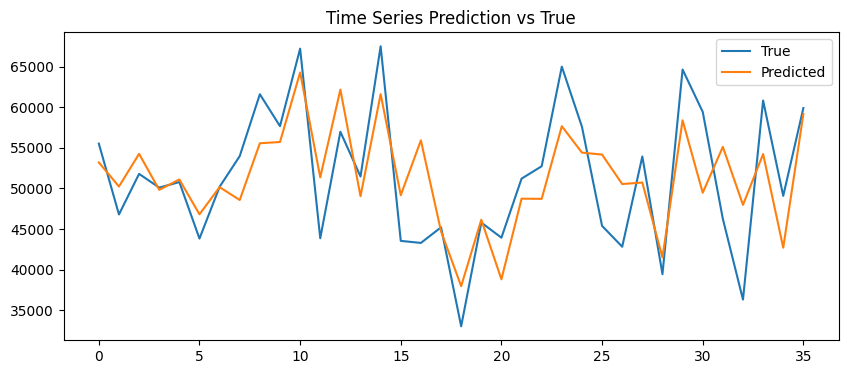

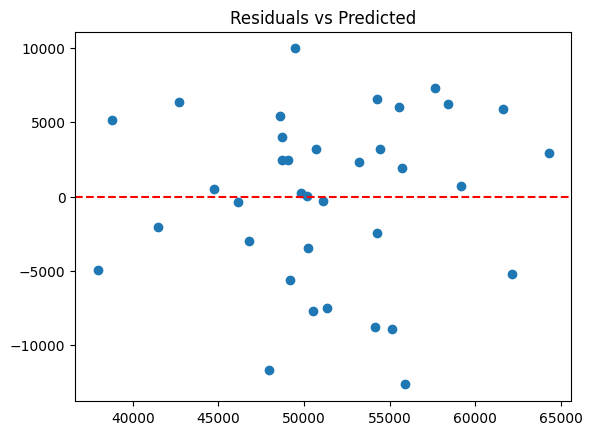

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("../data/processed/feature_engineered.csv", parse_dates=["join_date"])
df = df.sort_values("join_date")

# Feature engineering: create lag and rolling features
df["salary_lag1"] = df["salary"].shift(1)
df["salary_lag3"] = df["salary"].shift(3)
df["salary_roll3"] = df["salary"].rolling(window=3).mean()
df.dropna(inplace=True)

# Define features & target
X = df[["salary_lag1", "salary_lag3", "salary_roll3", "age", "tenure"]]
y = df["salary"]

train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
pipeline = Pipeline([ ("scaler", StandardScaler()), ("model", LinearRegression())])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

# plots
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label="True")
plt.plot(y_pred, label="Predicted")
plt.title("Time Series Prediction vs True")
plt.legend()
plt.show()

plt.scatter(y_pred, y_test - y_pred)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted")
plt.show()

## Time Series Modeling Documentation

### Features Chosen
- **salary_lag1**: Previous month’s salary value (captures immediate past trend).  
- **salary_lag3**: Salary value from 3 months ago (captures short-term patterns).  
- **salary_roll3**: 3-month moving average of salary (smooths local fluctuations).  
- **age**: Static demographic feature, potentially linked to salary level.  
- **tenure**: Number of years at the company, often predictive of salary growth.  

### Transformations
- **Lagging and Rolling Features**:  
  Standard practice in time series to incorporate autocorrelation and trend information.  
- **Scaling (StandardScaler)**:  
  Ensures that variables with different units/magnitudes (e.g., age vs. salary) are comparable within the model.  

### Pipeline Automation
- The modeling process uses an `sklearn` Pipeline, making it simple to:
  - Swap models (`LinearRegression`, `Ridge`, `RandomForestRegressor`, etc.)  
  - Add new preprocessing steps without changing the overall workflow.  

### Assumptions and Risks
- **Autocorrelation**: Assumes past salary influences future salary.  
- **Stationarity**: Linear regression assumes constant mean/variance in time, which may not hold.  
- **Residual Independence**: Errors should be uncorrelated; trends in residuals may indicate model misspecification.  
- **External Factors**: Salary is influenced by policies, promotions, and external market conditions, which are not included here.  

### Evaluation Metrics
- **Mean Squared Error (MSE)**: Penalizes large errors more heavily.  
- **Mean Absolute Error (MAE)**: Provides average magnitude of prediction errors.  
- **R² (Coefficient of Determination)**: Measures proportion of variance explained by the model.  

### Diagnostic Plots
1. **Prediction vs. True Series Plot**  
   - Compares predicted salaries against actual values over time.  
   - Helps detect whether the model captures overall trends.  

2. **Residuals vs. Predicted Plot**  
   - Checks for randomness of residuals.  
   - Non-random patterns indicate model assumptions may be violated.  